In [1]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler

In [26]:
df = pd.read_excel('GOLD_new.xls')
# df = pd.read_excel('GOLD.xls')
new_data = df
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)
dataset = new_data.values

#divide train group and test group
# train = dataset[0:1450,:] 
# valid = dataset[1450:,:]
train = dataset[0:997,:]
valid = dataset[997:,:]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [27]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, 
 input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

937/937 - 36s - loss: 0.0029 - 36s/epoch - 39ms/step


In [28]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [30]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rc('font', size=12)
# train = new_data[:1450]
# valid = new_data[1450:]
train = new_data[:997]
valid = new_data[997:]
valid['Predictions'] = closing_price

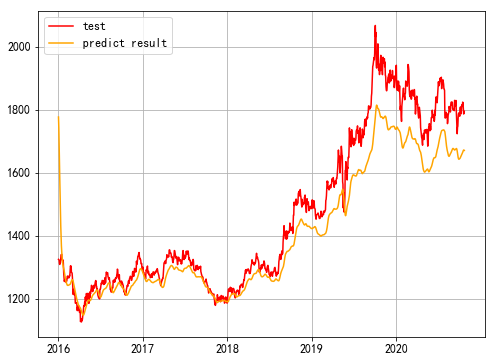

In [33]:
plt.figure(figsize=(8,6))
# plt.title("predict_BITCOIN",fontsize=20)
# plt.title("predict GOLD",fontsize=20)
# plt.plot(train['Value'],color="blue",label="train")# for GOLD, exchange value to USD
plt.plot(valid['USD'],color="red",label="test")# for GOLD, exchange value to USD
plt.plot(valid['Predictions'],color="orange",label="predict result")
plt.grid()
times = range(0, len(new_data)-997, 261)
plt.xticks(times, ['2016','2017','2018','2019','2020','2021'])
plt.legend()

plt.savefig("predict_GOLD.png")
plt.show()

In [21]:
# bitcoin part


import pandas as pd
import numpy as np

data = pd.read_excel('BITCOIN_new.xls')
bit = data['Value'].tolist()
bit = bit[1450:]
for i in range(0,len(bit)):
    bit[i] = valid['Predictions'][i]
def train_bitcoin(n,t,rate):
#  n: price of bitcoin when we bought in it
#  t: price of whole things we have(include money and bitcoin)
#  m: the number of bitcoin we have in the first day

    m = ((t*rate)/n)//0.01/100
    b =[]
    pic = []

    for i in range(29,len(bit)-2):
        if m!= 0 and bit[i]>bit[i+1] and bit[i]>bit[i+2]: 
            #if we hold bitcoin and know price decrease in the next two days
            t = (bit[i]*m*rate)//0.01/100    #money we have now
            n = 0
            m = 0
            b.append(m)
        elif m == 0 and bit[i]<(bit[i+2]*rate): 
            #if we don't hold bitcoin and we know price increase in the next two days
            n = bit[i]
            m = ((t*rate)/n)//0.01/100
            b.append(m)
            pic.append(m)
        else:
            continue

    return t,pic
a,b=train_bitcoin(614,1000,0.98)
print(b)
print(a)

[1.43, 1.35, 1.3, 1.68, 1.65, 2.14, 2.05, 2.19, 2.65, 2.54, 2.42, 3.02, 2.93, 3.14, 4.08, 8.42, 8.83, 14.03, 13.51, 20.53, 20.78, 24.93, 26.84, 44.13, 53.3, 53.41, 58.99, 56.63, 53.15, 50.51, 48.65, 51.28, 53.12, 63.17, 74.28, 92.29, 94.57, 118.86, 120.32, 116.33, 115.75, 224.76, 222.41, 219.83, 215.87, 220.56, 219.38, 239.41, 234.38, 236.63, 234.03, 280.99, 322.43, 344.28, 332.63, 392.98, 576.42, 565.75, 566.4, 651.58, 699.49, 696.58, 685.67, 664.05]
31605488.75


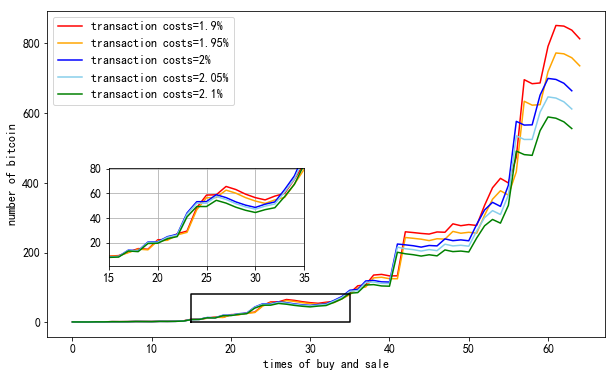

38740925.07 35028300.64 31605488.75 29109024.04 26426332.08


In [25]:
# bitcoin part


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import ConnectionPatch

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
a,b = train_bitcoin(614,1000,0.98)
a1,b1 = train_bitcoin(614,1000,0.9805)
a2,b2 = train_bitcoin(614,1000,0.981)
a3,b3 = train_bitcoin(614,1000,0.9795)
a4,b4 = train_bitcoin(614,1000,0.979)


plt.plot(b2,color="red",label="transaction costs=1.9%")
plt.plot(b1,color="orange",label="transaction costs=1.95%")
plt.plot(b,color="blue",label="transaction costs=2%")
plt.plot(b3,color="skyblue",label="transaction costs=2.05%")
plt.plot(b4,color="green",label="transaction costs=2.1%")
plt.xlabel('times of buy and sale')
plt.ylabel('number of bitcoin')
plt.legend()


axins = inset_axes(ax, width="35%", height="30%", loc='lower left',
                   bbox_to_anchor=(0.1, 0.2, 1, 1), 
                   bbox_transform=ax.transAxes)

axins.plot(b2,color="red")
axins.plot(b1,color="orange")
axins.plot(b,color="blue")
axins.plot(b3,color="skyblue")
axins.plot(b4,color="green")

zone_left = 15
zone_right = 35
x_axis_data = range(len(b))
x_ratio = 0  # extend rate of X range
y_ratio = 0.1  # extend rate of Y range

# range of X
xlim0 = x_axis_data[zone_left]-(x_axis_data[zone_right]-x_axis_data[zone_left])*x_ratio
xlim1 = x_axis_data[zone_right]+(x_axis_data[zone_right]-x_axis_data[zone_left])*x_ratio

# range of Y
y = np.hstack((b2[zone_left:zone_right], b1[zone_left:zone_right],
               b[zone_left:zone_right],b3[zone_left:zone_right],
               b4[zone_left:zone_right]))
ylim0 = np.min(y)-(np.max(y)-np.min(y))*y_ratio
ylim1 = np.max(y)+(np.max(y)-np.min(y))*y_ratio

# range of subplot
axins.set_xlim(xlim0, xlim1)
axins.set_ylim(ylim0, ylim1)

tx0 = xlim0
tx1 = xlim1
ty0 = ylim0
ty1 = ylim1
sx = [tx0,tx1,tx1,tx0,tx0]
sy = [ty0,ty0,ty1,ty1,ty0]
ax.plot(sx,sy,"black")


plt.grid()
plt.savefig('transcationCostBitcoin.png')
plt.show()
print(a2,a1,a,a3,a4)

In [35]:
# gold part


import pandas as pd
import numpy as np

data = pd.read_excel('GOLD_new.xls')
bit = data['USD'].tolist()
bit = bit[997:]
for i in range(0,len(bit)):
    bit[i] = valid['Predictions'][i]

def train_gold(n,t,rate):
#  n: price of gold when we bought in it
#  t: price of whole things we have(include money and gold)
#  m: the number of gold we have in the first day

    m = (t*rate)/n
    b =[]
    pic = []

    for i in range(32,len(bit)-2):
        if m!= 0 and bit[i]>bit[i+1] and bit[i]>bit[i+2]: 
            #if we hold bitcoin and know price decrease in the next two days
            t = (bit[i]*m*rate)//0.01/100    #money we have now
            n = 0
            m = 0
            b.append(m)
        elif m == 0 and bit[i]<(bit[i+2]*rate): 
            #if we don't hold bitcoin and we know price increase in the next two days
            n = bit[i]
            m = (t*rate)/n
            b.append(m)
            pic.append(m)
        else:
            continue

    return t,pic
a,b=train_gold(1265.55,1000,0.99)
print(b)
print(a)

[0.7392015189042042, 0.738345692507482, 0.7168017750871075, 0.714520779710568, 0.6630889680979591]
1191.04


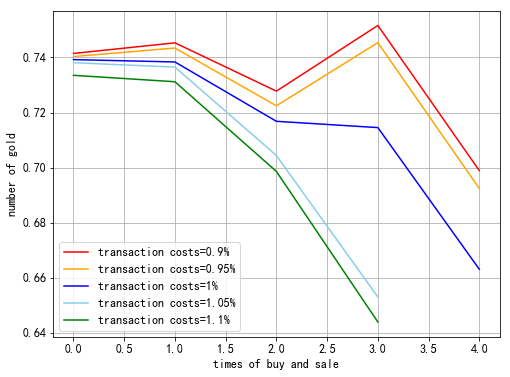

1256.64 1244.32 1191.04 1172.38 1155.49


In [36]:
plt.figure(figsize=(8,6))
a,b = train_gold(1265.55,1000,0.99)
a1,b1 = train_gold(1265.55,1000,0.9905)
a2,b2 = train_gold(1265.55,1000,0.991)
a3,b3 = train_gold(1265.55,1000,0.9895)
a4,b4 = train_gold(1265.55,1000,0.989)
plt.plot(b2,color="red",label="transaction costs=0.9%")
plt.plot(b1,color="orange",label="transaction costs=0.95%")
plt.plot(b,color="blue",label="transaction costs=1%")
plt.plot(b3,color="skyblue",label="transaction costs=1.05%")
plt.plot(b4,color="green",label="transaction costs=1.1%")
plt.xlabel('times of buy and sale')
plt.ylabel('number of gold')

plt.legend()
plt.grid()
plt.savefig('transcationCostGold.png')
plt.show()
print(a2,a1,a,a3,a4)